# Linear Models: Linear Regression / Polinomial Regression



original source - https://habrahabr.ru/company/ods/blog/322076/ by Pavel Nesterov


# Предиктивная модель

*Обучение с учителем* - задача вывода функции $f: X \rightarrow Y$ по заданному размеченному множеству данных; каждый пример является парой вектора признаков объекта и желаемого отклика на него $D = \left\{ \left( x_i, y_i \right) \right\}_{i=1, \ldots, n}$, например целевая переменная может быть:
    * категориальной - задача классификации;
    * непрерывной - задача регрессии;
    * порядковой - задача ранжирования.

*Предиктивная модель* - это параметрическое семейство функций (гипотез):

$$\large \mathcal{H} = \left\{ h\left(x, \theta\right) | \theta \in \Theta \right\}$$

* где
    * $\large h: X \times \Theta \rightarrow Y$    
    * $\large \Theta$ - множество параметров

# Алгоритм обучения

*Алгоритм обучения* - это отображение из множества данных в множество гипотез:

$$\large \mathcal{M}: X \times Y \rightarrow \mathcal{H}$$

Обычно выделяют два шага при решении задачи обучения с учителем:
1. Обучение, когда выбирается гипотеза: $\large h = \mathcal{M}\left(D\right)$
2. Тестирование, когда для заданного примера $\large x$ вычисляется выход модели $\large \hat{y} = h\left(x\right)$

# Минимизация эмпирического риска
[*Минимизация эмпирического риска*](https://ru.wikipedia.org/wiki/%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%8D%D0%BC%D0%BF%D0%B8%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B3%D0%BE_%D1%80%D0%B8%D1%81%D0%BA%D0%B0) - это принцип в статистической теории обучения для решения широкого круга задач, включая обучение с учителем, в частности задачи классификации и регрессии.

Введем вещественнозначную функцию (функцию ошибки):
$$\large L: Y \times Y \rightarrow \mathbb{R}$$
с помощью которой будем измерять на сколько отличается прогноз $\large \hat {y}$ от истинного значения целевой переменной $\large y$.

Риском гипотезы $\large h$ будем называть ожидаемое значение функции ошибки по распределению примеров:
$$\large \begin{array}{rcl}Q\left(h\right) &=& \text{E}_{x, y \sim P\left(x, y\right)}\left[L\left(h\left(x\right), y\right)\right] \\
&=& \int L\left(h\left(x\right), y\right) d P\left(x, y\right)
\end{array}$$

К сожалению совместная плотность $\large P\left(x, y\right)$ неизвестна (иначе бы не было и задачи). Но мы можем вычислить аппроксимацию выражения выше как среднее значение функции стоимости по выборке (эмпирический риск):

$$\large Q_{\text{emp}}\left(h\right) = \frac{1}{n} \sum_{i=1}^n L\left(h\left(x_i\right), y_i\right)$$

Согласно принципу мы должны выбрать ту гипотезу, которая минимизирует эмпирический риск:
$$\large \hat{h} = \arg \min_{h \in \mathcal{H}} Q_{\text{emp}}\left(h\right)$$

Примеры функций ошибки:
* классификация: $\large L\left(\hat{y}, y\right) = \text{I}\left[\hat{y} = y\right]$
* регрессия: $\large L\left(\hat{y}, y\right) = \left(\hat{y} - y\right)^2$

# Обобщение

Главным недостатком принципа минимизации эмпирического риска является переобучение:

* мы говорим, что модель обладает *обобщающей способностью* если вероятность ошибки на тестовом множестве данных (такое множество примеров, которое не участвовало в обучении ни в каком виде) мала или прогнозируема;
* *переобучение* провляется в том, что модель показывает хорошие результаты на обучающем множестве и плохие на тестовом. Такие модели не обладают обобщающей способностью.

In [1]:
# plot graphics in the notebook 
%matplotlib inline
# support operations for large, multi-dimensional arrays and matrices
import numpy as np
# make experiments reproducible
np.random.seed(12345)
# extension of main plotting library matplotlib
import seaborn as sns
# main library for plotting
import matplotlib.pyplot as plt
# set style
plt.style.use("fivethirtyeight")
# set default size of plots
plt.rcParams['figure.figsize'] = 16, 10

In [2]:
def generate_wave_set(n_support=1000, n_train=25, std=0.1):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2*pi
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # calculate sine values
    data['values'] = np.sin(data['support']) + 1
    # choose n_train random vakues from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

In [3]:
# sample 25 points from 1000 available from noised sin manifold 
data = generate_wave_set(1000, 25)
print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])

Shape of X is (25,)
Head of X is [0.48428956 0.57234221 0.66039485 0.74215802 0.81134225 1.30821075
 1.67928977 1.79250031 1.98118456 2.2453425 ]


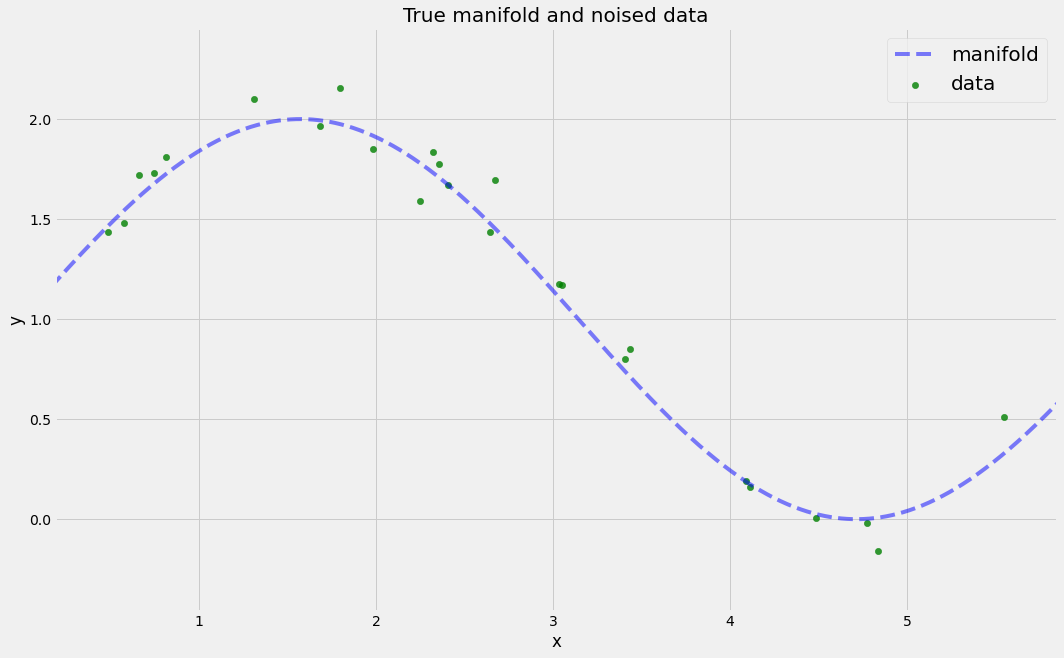

In [4]:
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Линейная регрессия

Ограничим пространство гипотез множеством линейных функций от аргумента размерности $\large \left(m + 1\right)$, смещение и один параметр на каждый признак ($\large x_0 = 1$):

$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(\vec{x}\right) &=& w_0 x_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m \\
&=& \sum_{i=0}^m w_i x_i \\
&=& \vec{x}^T \vec{w}
\end{array}$$
где:
* $\large \vec{x} \in \mathbb{R}^{m + 1}$

Тогда эмпирический риск принимает вид среднеквадратичной ошибки:
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}$$
где:
* $\large \vec{w} \in \mathbb{R}^{m + 1}$
* $\large \vec{y} \in \mathbb{R}^n$
* $\large X$ это $\large n \times m + 1$ матрица, где каждая строка это вектор признаков.

In [5]:
# add column of ones to the first position
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print('Top rows of X')
print(X[:5, :])

Top rows of X
[[1.         0.48428956]
 [1.         0.57234221]
 [1.         0.66039485]
 [1.         0.74215802]
 [1.         0.81134225]]


Выведем алгоритм обучения. Воспользуемся тем фактом, что функция стоимости в данном случае является выпуклой, это позволит нам найти глобальный оптимум:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\
&=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right)
\end{array}$$

Такое решение называется методом наименьших квадратов (МНК):
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}$$

МНК решение обладает интересными свойствами, которые можно найти в теореме <a href="https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0">Гаусса-Маркова</a>.

In [6]:
# linear algebra magic of numpy
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])

In [7]:
print('Fitted params')
print(w)

Fitted params
[ 2.33512272 -0.41939554]


In [8]:
y_hat = np.dot(w, X.T)

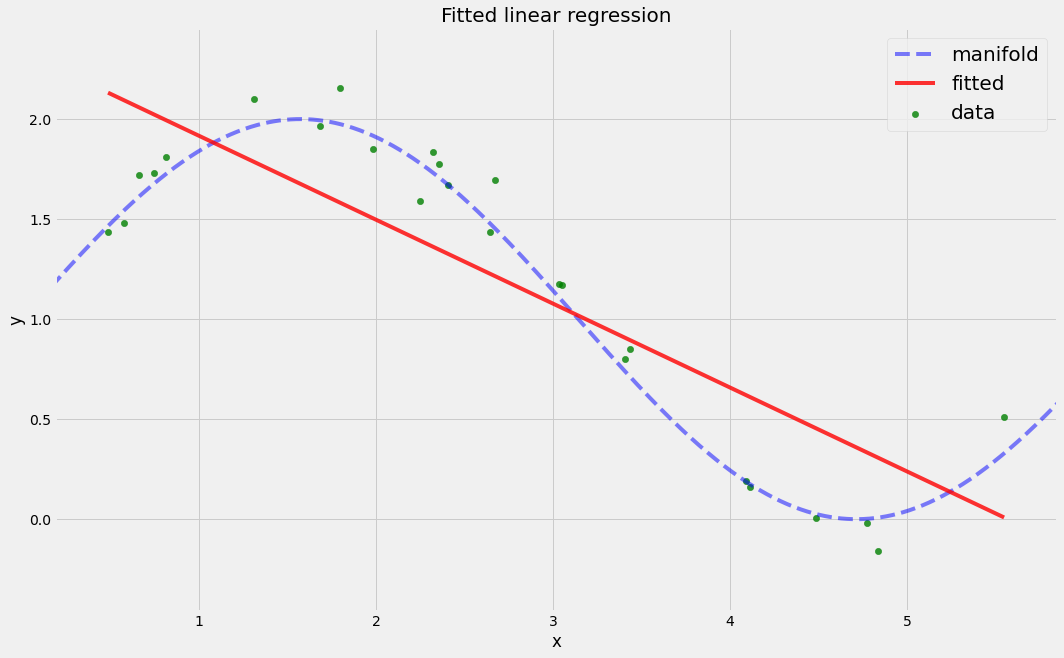

In [9]:
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
np.mean((data['y_train'] - y_hat)**2)

0.15308575081318787

## Вероятностная интерпретация
Расмотрим линейную регрессию в следующем виде: 

$$\large \vec y = \vec{x}^T \vec{w} + \epsilon,$$

будем считать, что случайные ошибки $\epsilon$ берутся из центрированного <a href="https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5">нормального распределения</a>:

$$\large \epsilon_i \sim \mathcal{N}\left(0, \sigma^2\right)$$

Перепишем модель:

$$\large \begin{array}{rcl} 
y_i &=& \sum_{j=0}^m w_j X_{ij} + \epsilon_i \\
&\sim& \sum_{j=0}^m w_j  X_{ij} + \mathcal{N}\left(0, \sigma^2\right) \\
p\left({y_i} \mid X; \vec{w} \right) &=& \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right)
\end{array}$$

Так как примеры берутся независимо (ошибки не скоррелированы – одно из условий теоремы Маркова-Гаусса, то полное [правдоподобие данных](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%BF%D1%80%D0%B0%D0%B2%D0%B4%D0%BE%D0%BF%D0%BE%D0%B4%D0%BE%D0%B1%D0%B8%D1%8F) будет выглядеть как произведение функций плотности $p\left(y_i\right)$. Рассмотрим логарифм правдоподобия, что позволит нам перейти от произведения к сумме:

$$\Large \begin{array}{rcl} 
\log p\left({y_i} \mid X; \vec{w}\right) &=& \log \prod_{i=1}^n \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right) \\
&=& \sum_{i=1}^n \log \mathcal{N}\left(\sum_{j=0}^m w_j X_{ij}, \sigma^2\right) \\
&=& -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{x}^T \vec{x}_i\right)^2
\end{array}$$

Воспользуемся [методом максимального правдоподобия](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B0%D0%B2%D0%B4%D0%BE%D0%BF%D0%BE%D0%B4%D0%BE%D0%B1%D0%B8%D1%8F), который предлагает оцениванить неизвестный параметры путём максимизации функции правдоподобия. Нам нужно максимизировать выражение $p\left(\vec{y} \mid  X; \vec{w}\right)$ по вектору $\vec w$, получив при этом $ \hat w$. Обратите внимание, что при максимизации функции по какому-то параметру можно выкинуть все члены, не зависящие от этого параметра:

$$\Large \begin{array}{rcl} 
\hat{w} &=& \arg \max_{\textbf w} p\left(\vec{y}\mid  X; \vec{w}\right) = \arg \max_{\textbf w} \log p\left(\vec{y}\mid X; \vec{w}\right)\\
&=& \arg \max_{\textbf w} -\frac{n}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{w}^{\text{T}} \vec{x}_i\right)^2 \\
&=& \arg \max_{\textbf w} -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{w}^{\text{T}} \vec{x}_i\right)^2 \\
&=&  \arg \max_{\textbf w} \mathcal{L}\left( X, \vec{y}, \vec{w} \right)
\end{array}$$

Таким образом, мы увидели, что максимизация правдоподобия данных – это то же самое, что и минимизация среднеквадратичной ошибки (при справедливости указанных выше предположений). Получается, что именно такая функция стоимости является следствием того, что ошибка распределена нормально, а не как-то по-другому.

# Полиномиальная регрессия

Расширим множество гипотез до множества всех полиномов степени $\large p$. Для количества признаков $\large m = 1$ множество гипотез будет:
$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(x\right) &=& w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^p \\
&=& \sum_{i=0}^p w_i x^i
\end{array}$$

В остальном ничего не поменялось.

In [11]:
degree_list = [1, 2, 3, 10, 12, 13]

In [12]:
dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, 1 + 1)))

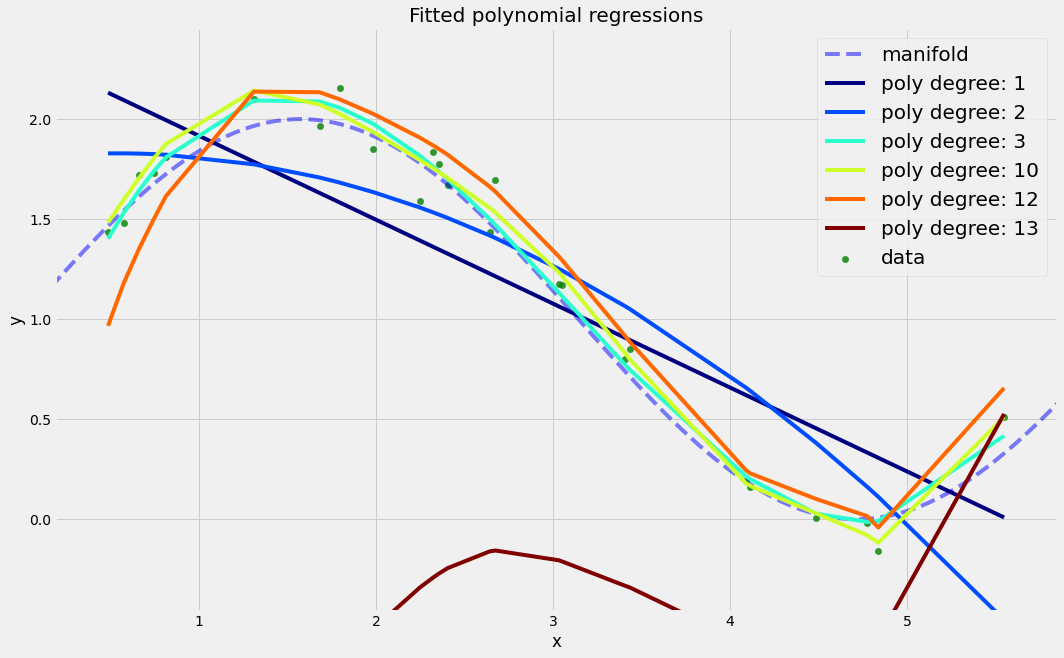

In [13]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: np.power(data['x_train'], n), range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [14]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.15308575081318787
2 0.1144035587077057
3 0.008542677738796101
10 0.006791641807293177
12 0.03543681077712772
13 9.431567393034811


/Users/terpiljenya/projects/machine_learning_projector/venv/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/terpiljenya/projects/machine_learning_projector/venv/lib/python3.7/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<AxesSubplot:>

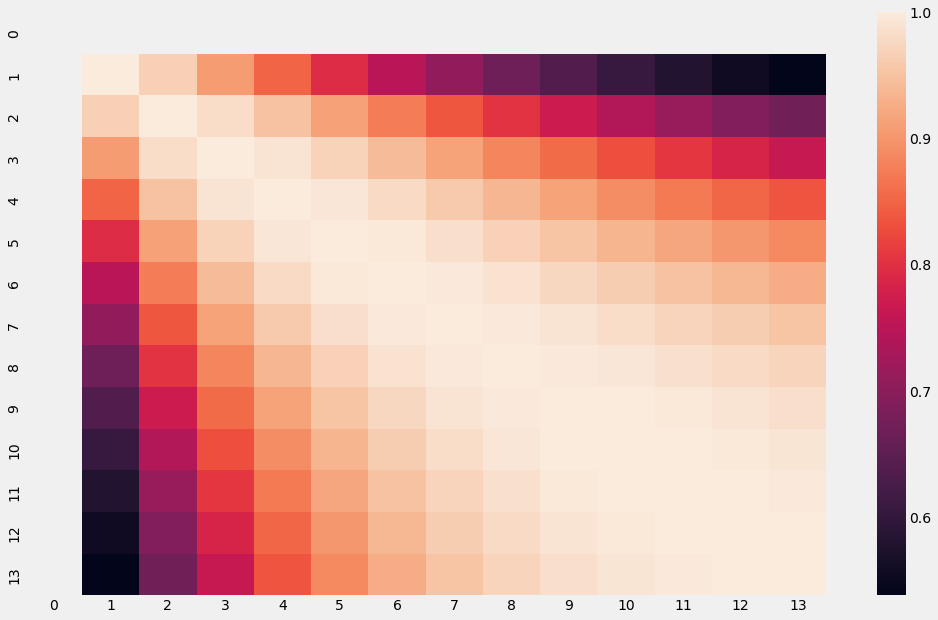

In [15]:
sns.heatmap(np.corrcoef(X.T))

In [16]:
# eigenvalues for poly-13 features, we can see multicollinearity
np.linalg.eigvals(np.dot(X.T, X))

array([ 2.41689057e+19,  1.13604433e+15,  1.52784980e+11,  1.12653366e+08,
        2.86163648e+05,  2.29556533e+03,  3.59744392e+01,  5.70922546e+00,
       -8.45710061e-01,  4.66840160e-01,  4.73206250e-02,  2.63835163e-03,
        6.13043980e-06, -2.59270410e-05])

Для тестирование на линейную зависимость или мультиколлинеарность можно исползовать [число обусловленности](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%BE_%D0%BE%D0%B1%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8) матрицы $X^T X$. Число обусловленности равно отношению большего собственного числа к меньшему. Большое число определенности или наличие близких к нулю собственных чисел является признаком мультиколлинеарности.

In [17]:
np.linalg.cond(np.dot(X.T, X))

4.174649473550447e+25

К сожалению инвертирование $X^T X$ при нечеткой мультиколлинеарности численно нестабильно, но существует решение. Вспомним, что любую полноранговую матрицу $X$ размера $n \times m$ можно представить в виде:
$$\Large X = QR$$
где
- $Q^T Q = E$
- $R$ треугольная матрица размера $m \times m$

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(QR\right)^T \left(QR\right) \vec{w} = \left(QR\right)^T \vec{y} \\
&\Leftrightarrow& R^T \left(Q^T Q\right) R \vec{w} = R^T Q^T \vec{y} \\
&\Leftrightarrow& R^T R \vec{w} = R^T Q^T \vec{y} \\
&\Leftrightarrow& \left(R^T\right)^{-1} R^T R \vec{w} = \left(R^T\right)^{-1}  R^T Q^T \vec{y} \\
&\Leftrightarrow& R \vec{w} = Q^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(R\right)^{-1} Q^T \vec{y} \\
\end{array}$$

Треугольная матрица легко инвертируется, поэтому решение заметно стабильнее. Если бы нам был интересен только прогноз, то можно было бы и не выводить значения параметров модели:

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& R \vec{w} = Q^T \vec{y} \\
&\Leftrightarrow& Q R \vec{w} = Q Q^T \vec{y} \\
&\Leftrightarrow& X \vec{w} = Q Q^T \vec{y} \\
\end{array}$$

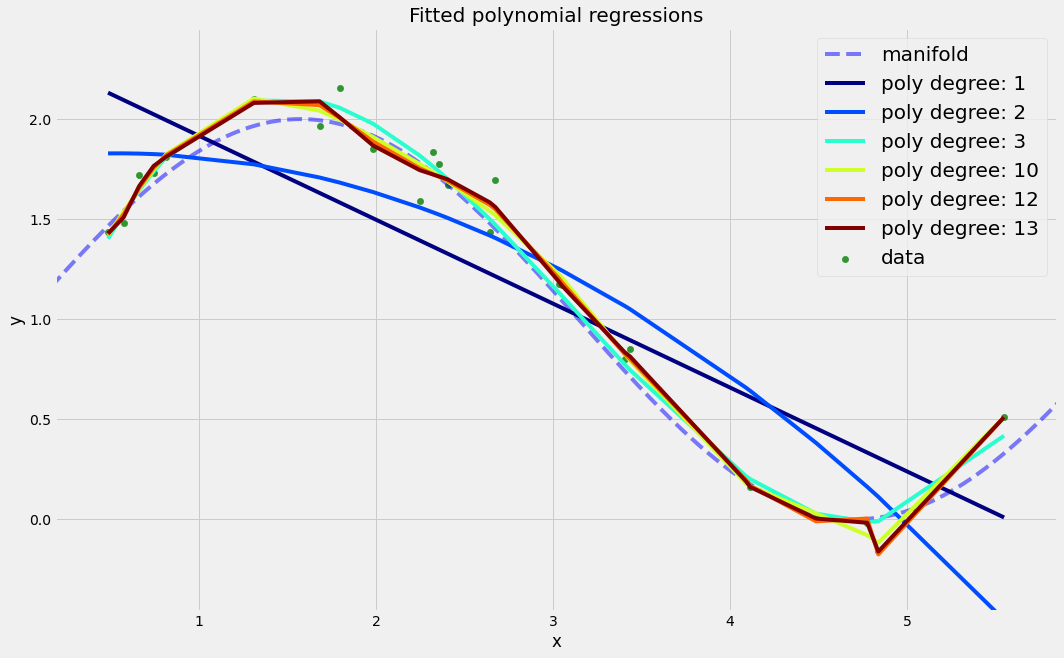

In [18]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    q, r = np.linalg.qr(X)
    w = np.dot(np.dot(np.linalg.inv(r), q.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [19]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.15308575081318784
2 0.1144035587077057
3 0.008542677738796012
10 0.005878468837005514
12 0.005180084918647509
13 0.005042982904382582


Посмотрим на значение параметров, которые получились в результате применения алгоритма обучения:

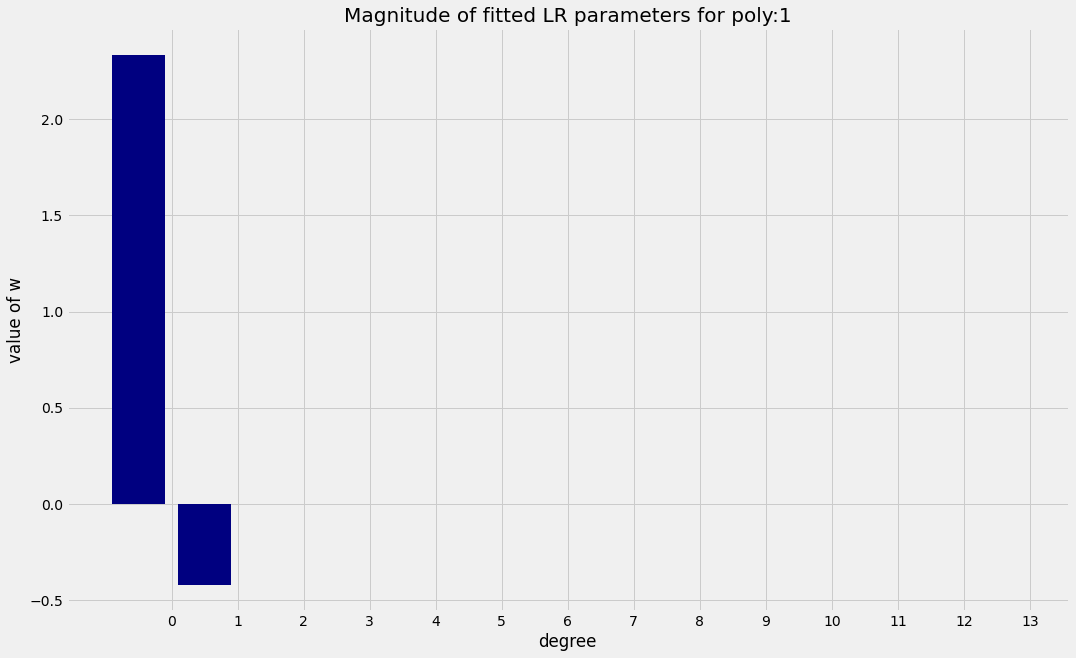

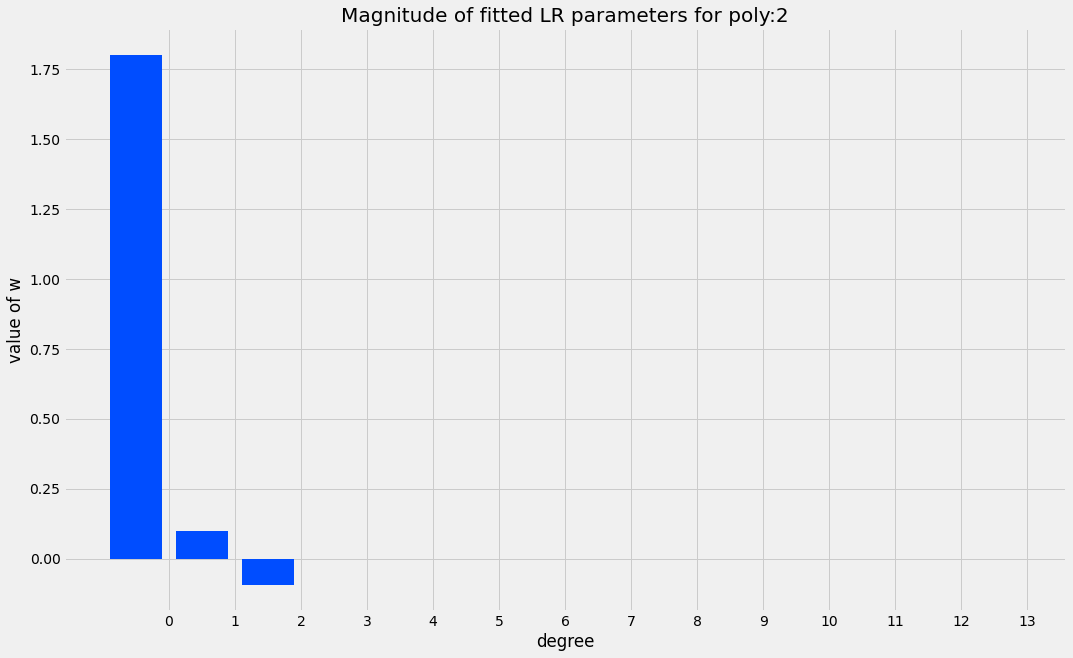

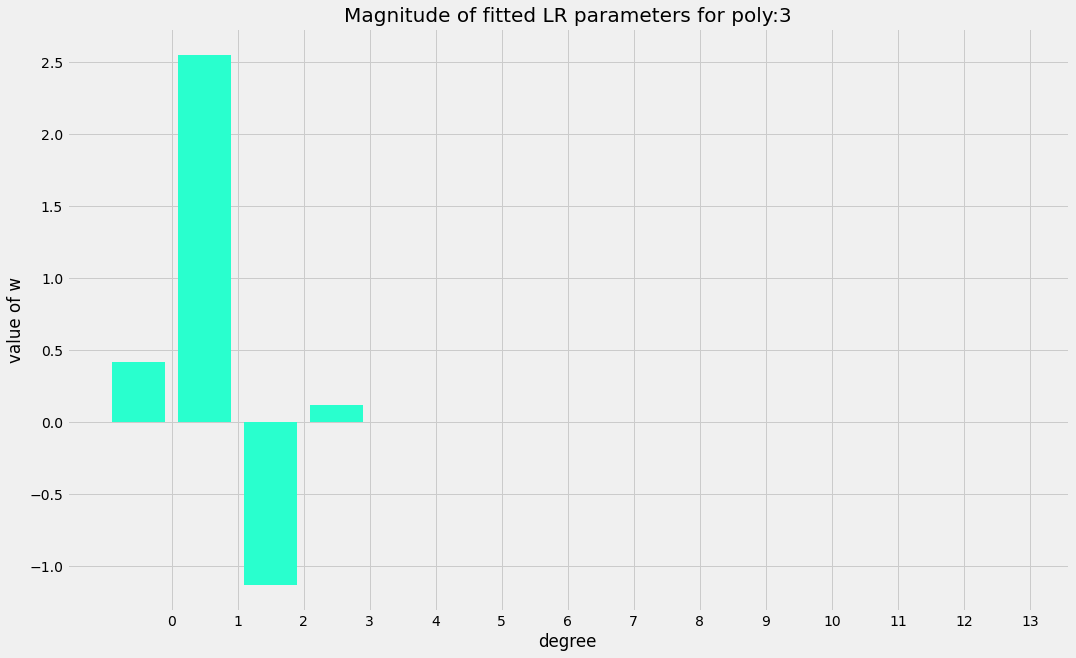

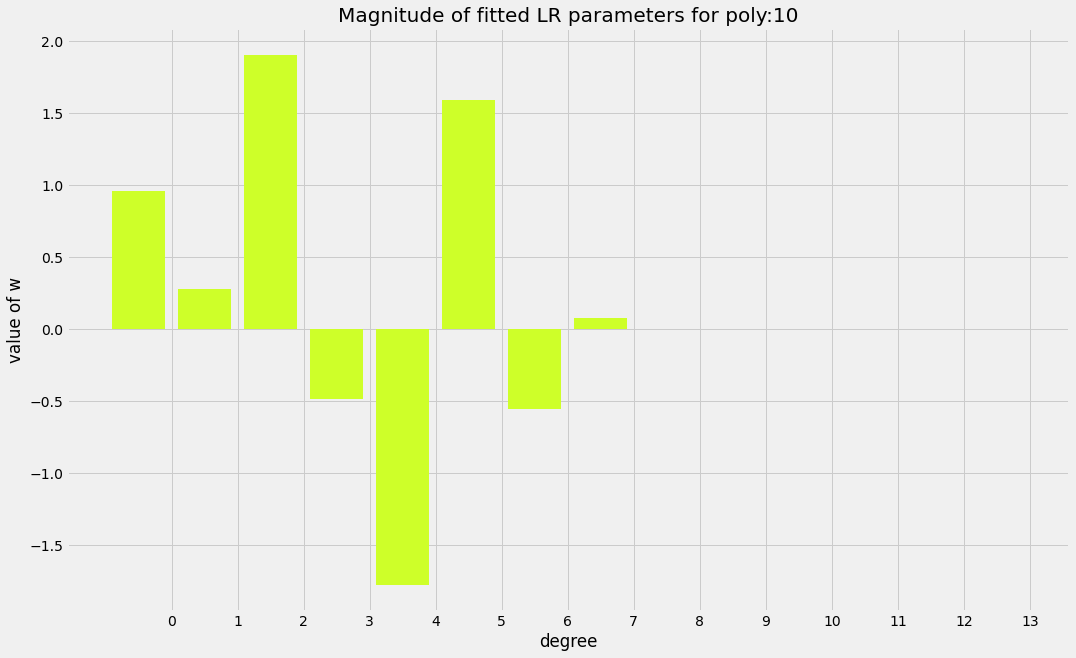

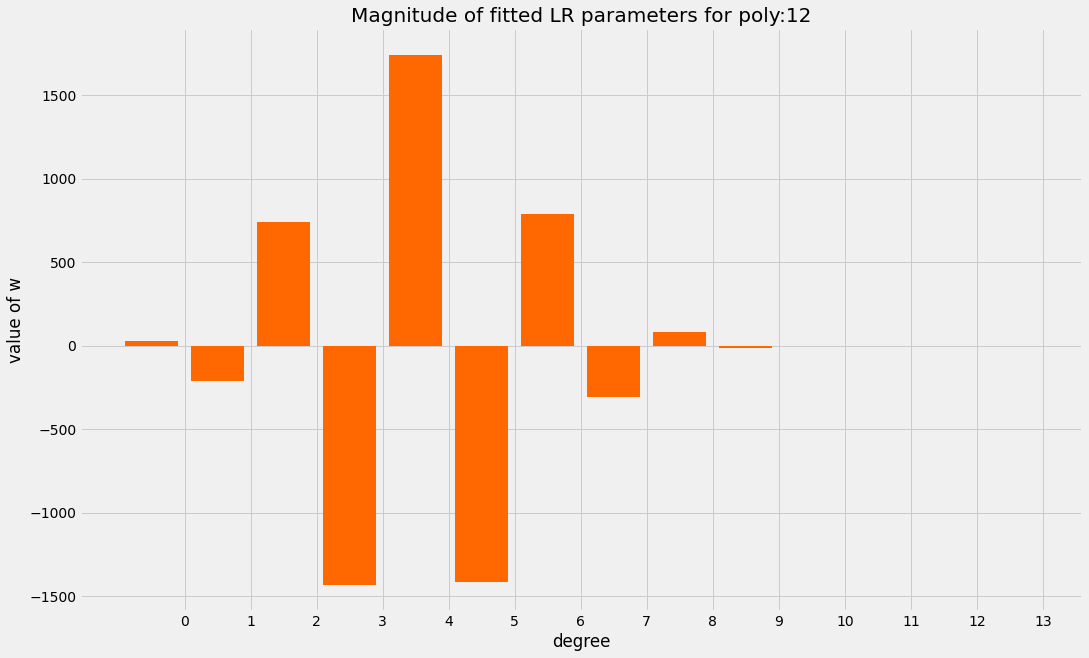

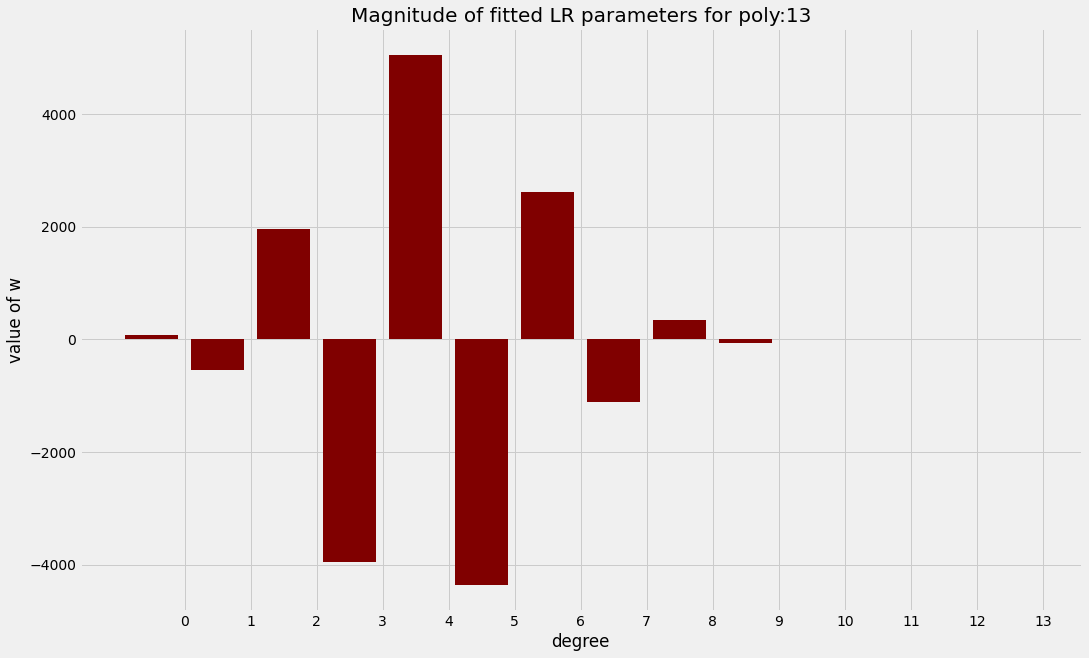

In [20]:
for ix, t in enumerate(w_list):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree, fontsize=20)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# Регуляризация

Симптомы переобучения видны невооруженным взглядом: выученная функция интерполирует данные (старается пройти чуть ли не через каждую точку данных). Так же мы видим, что абсолютные значения весов растут вместе с увеличением степени полинома. Что если мы наложим какой-нибудь штраф на амплитуду весов? В общем случае штраф выглядит следующим образом:
$$\large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda R\left(\vec{w}\right)$$
где:
* $\large \lambda$ - это параметр регуляризации.

# $L_2$ регуляризация

Попробуем добавить ограничение на $L_2$ норму вектора параметров модели:

$$\large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2 = \frac{1}{2} \vec{w}^T \vec{w}$$

тогда целевая функция примет вид:

$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}$$

Как и раньше, продифференцируем по параметрам $\large \vec{w}$:
$$\large \begin{array}{rcl}\Large \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \left(\frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}\right) \\
&=& \frac{\partial}{\partial \vec{w}}\left( \frac{1}{2} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w} \right) \\
&=& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w}
\end{array}$$

и найдем решение:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} + \lambda \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(X^T X + \lambda E\right) \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X + \lambda E\right)^{-1} X^T \vec{y}
\end{array}$$

Такая регрессия называется гребневой регрессией (**Ridge regression**). При увеличении параметра регуляризации, матрица $X^T X + \lambda E$ становится "менее сингулярной", т.е. **регулярной**, а задача становится более определенной. Для такой матрицы число обусловленности будет равно: $\dfrac{e_\text{max}+λ}{e_\text{min}+λ}$, где $e_x$ — это собственные числа матрицы. Таким образом, увеличивая параметр регуляризации мы уменьшаем число обусловленности.

![ridge](https://github.com/mephistopheies/mlworkshop39_042017/raw/a6426fd652faa38864c3ea4538e000539106fb56/1_ml_intro/ipy/images/l2reg.png)

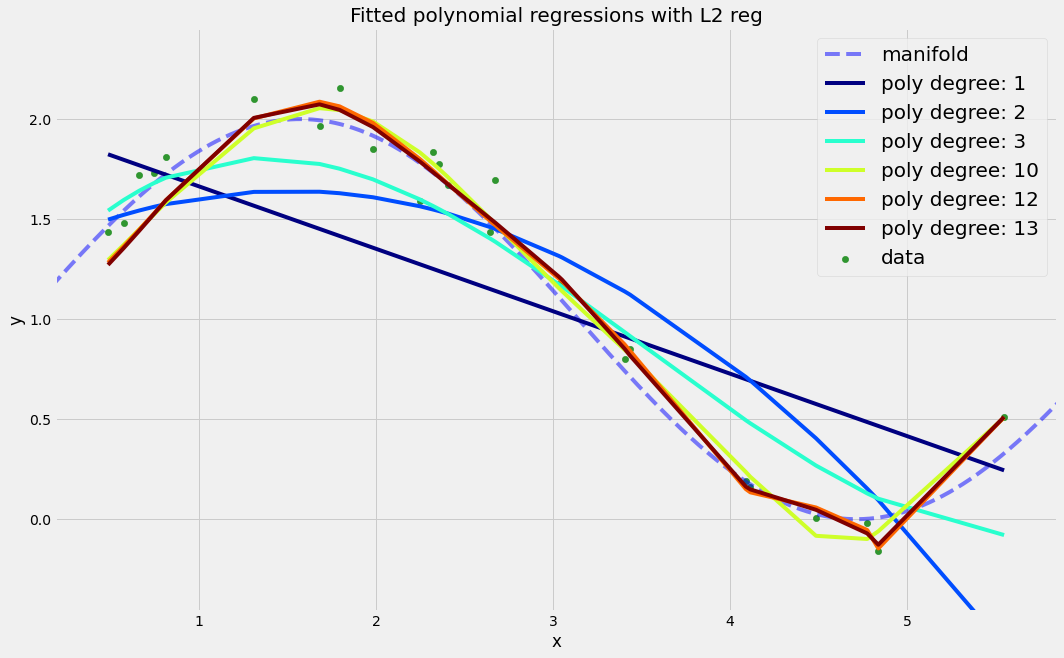

In [21]:
# define regularization parameter
lmbd = 1

degree_list = [1, 2, 3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

w_list_l2 = []
err = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    w_list_l2.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    err.append(np.mean((data['y_train'] - y_hat)**2))

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L2 reg', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [22]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.18286692101468838
2 0.13402161291534775
3 0.05292107279005572
10 0.016459833055317487
12 0.014897116782087265
13 0.014767055228637724


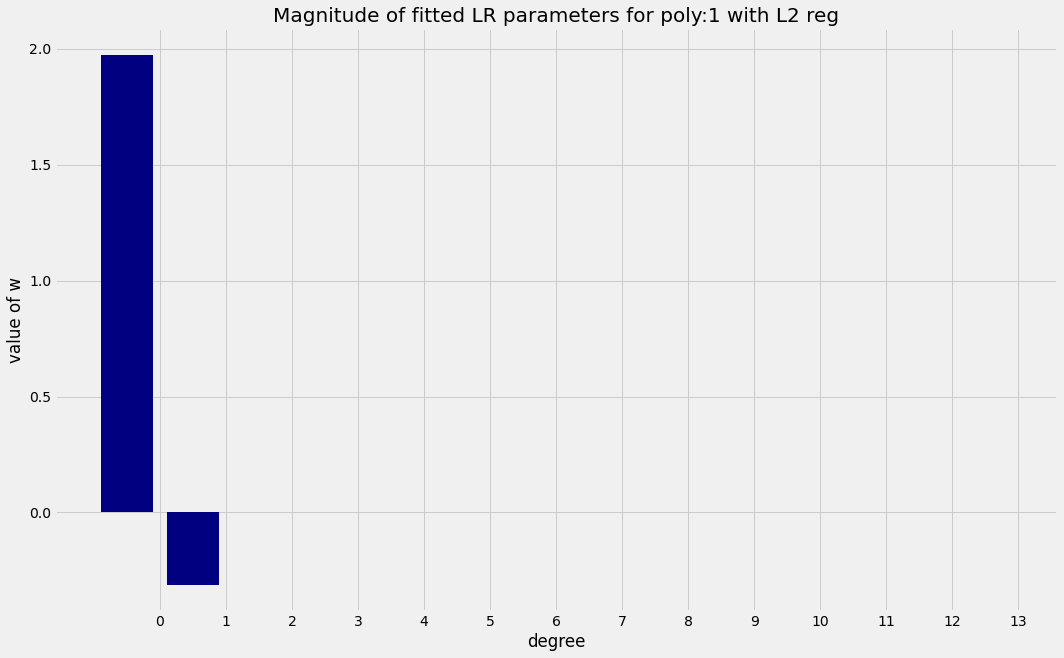

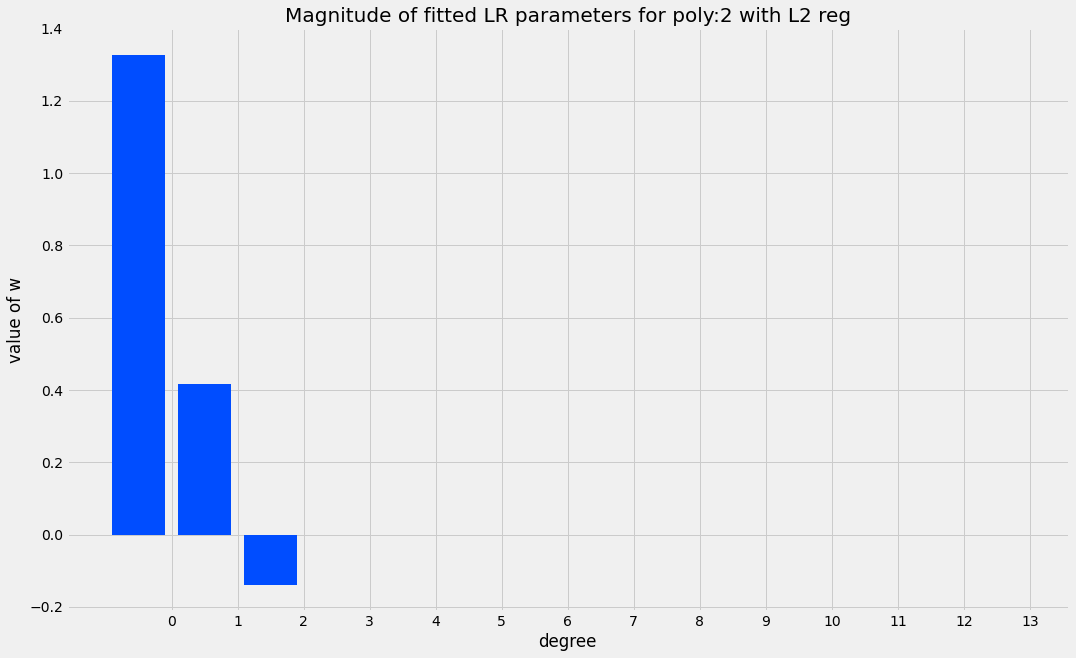

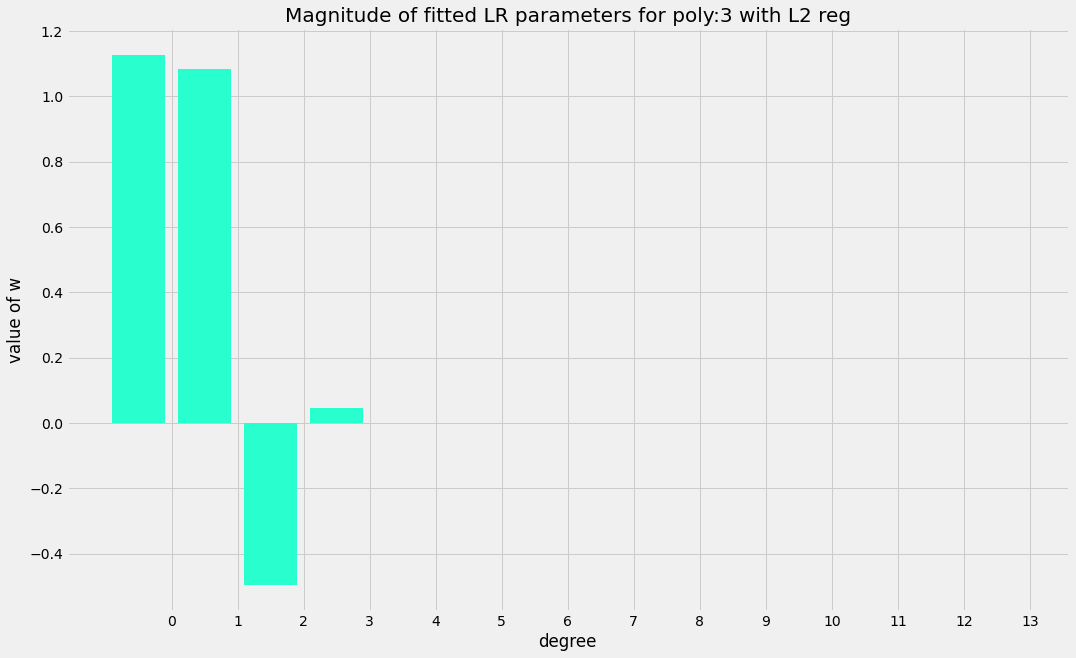

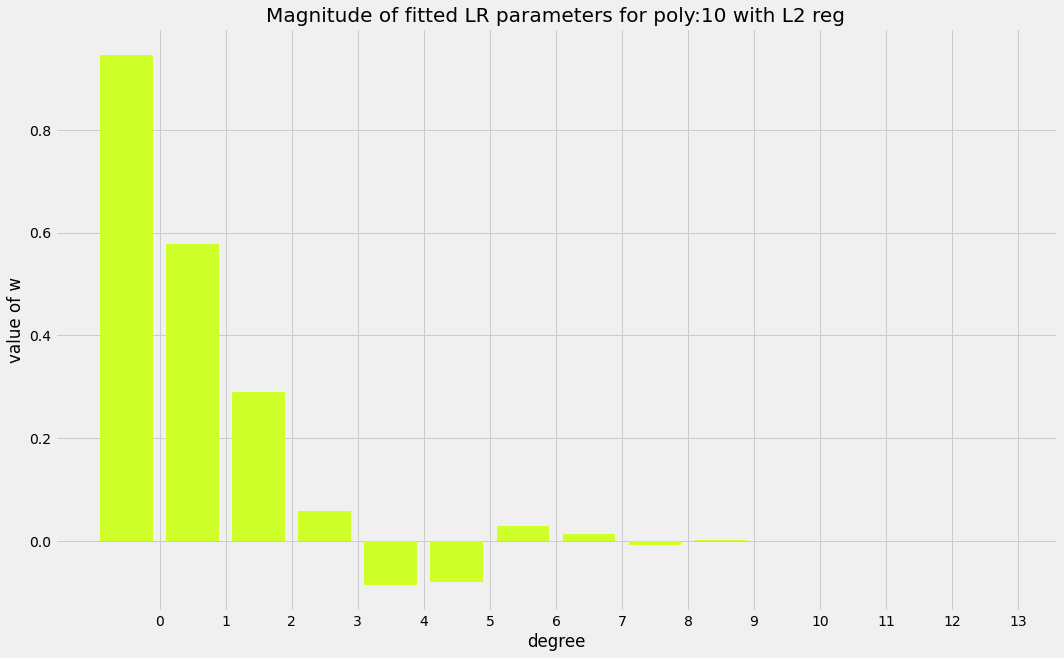

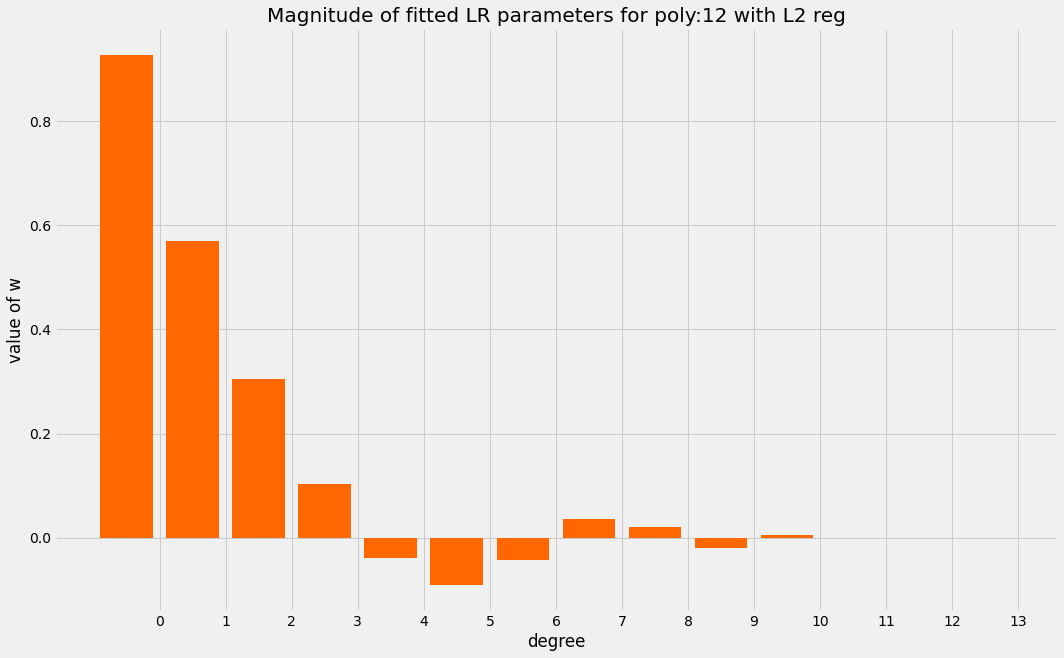

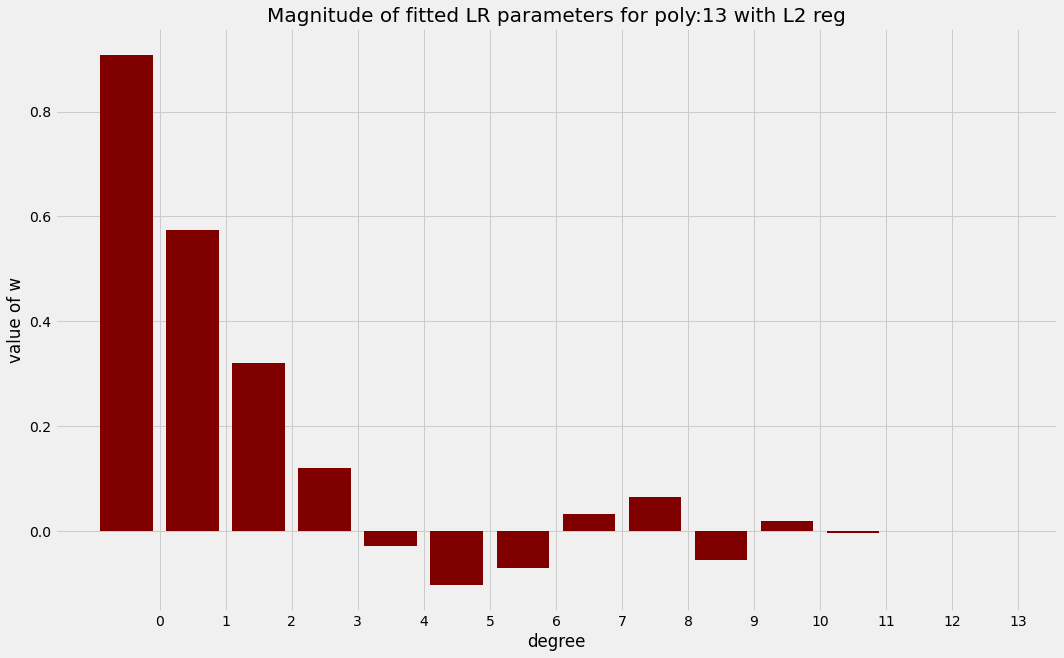

In [23]:
for ix, t in enumerate(w_list_l2):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L2 reg' % degree, fontsize=20)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# $L_1$ регуляризация
<center>или **Lasso** (least absolute shrinkage and selection operator)</center>

Добавим ограничение на $L_1$ норму вектора параметров:

$$\large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left| w_j \right|$$

целевая функция примет вид:

$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \lambda \sum_{j=1}^m \left| w_j \right|$$

К сожалению, задача в этом виде не имеет общего аналитического решения, но мы можем воспользоваться методом градиентного спуска для поиска оптимального значения параметров модели:

$$\large \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{n}\sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \lambda \text{sign}(\vec{w})$$

Формула для итеративного обновления весов:
$$\large \vec{w}_{\text{new}} := \vec{w} - \alpha \frac{\partial \mathcal{L}}{\partial \vec{w}}$$
где:
* $\large \alpha$ - это скорость обучения или размер градиентного шага.

In [24]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T

# define MSE function to evaluate model
# we expect that durint training process this value will be decreasing
def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

# initial weights of the model
w = np.array([-1.0] * X.shape[1])
# w = np.random.normal(size=X.shape[1])

# maximim number of iterations
n_iter = 20
# alpha or learning rate
lr = 0.00000001
# we will keep all MSE values to plot graph
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))
    print(loss[-1])

1.3051230956770203e+38
1.2197910238566862e+58
1.1400381671352446e+78
1.0654997430754898e+98
9.958348195892061e+117
9.30724755544128e+137
8.698717433278894e+157
8.129974467026255e+177
7.598417277199043e+197
7.101614568730044e+217
6.637294010442865e+237
6.203331841612278e+257
5.79774315807251e+277
5.418672833443038e+297
inf
inf
inf
inf
inf
inf


/Users/terpiljenya/projects/machine_learning_projector/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':


# Стандардизация

Что бы избезать расхождения алгоритма градиентного спуска и выровнять амплитуду признаков мы можем привести все признаки к единому стандарту: что бы среднее значение признаков было равно нулю, а дисперсия единице. Для этого необлодимо из каждого признака вычесть свое среднее (по столбцу) и разрелить на стандартное отклонение. Параметры преобразования мы вычисляем на тренировочном наборе:

$$\large \begin{array}{rcl} \overline{\mu}_{\cdot j} &=& \frac{1}{n} \sum_{i=1}^n x_{ij} \\
\overline{\sigma}_{\cdot j} &=& \sqrt{\frac{1}{n} \sum_{i=1}^n \left( x_{ij} - \overline{\mu}_{\cdot j} \right)}
\end{array}$$

а применяем как к тренировочному, так и к тестовому:

$$\large \vec{x}_{\text{new}} = \frac{\vec{x} - \overline{\mu}}{\overline{\sigma}}$$

In [25]:
# import norm class from scipy
from scipy.stats import norm

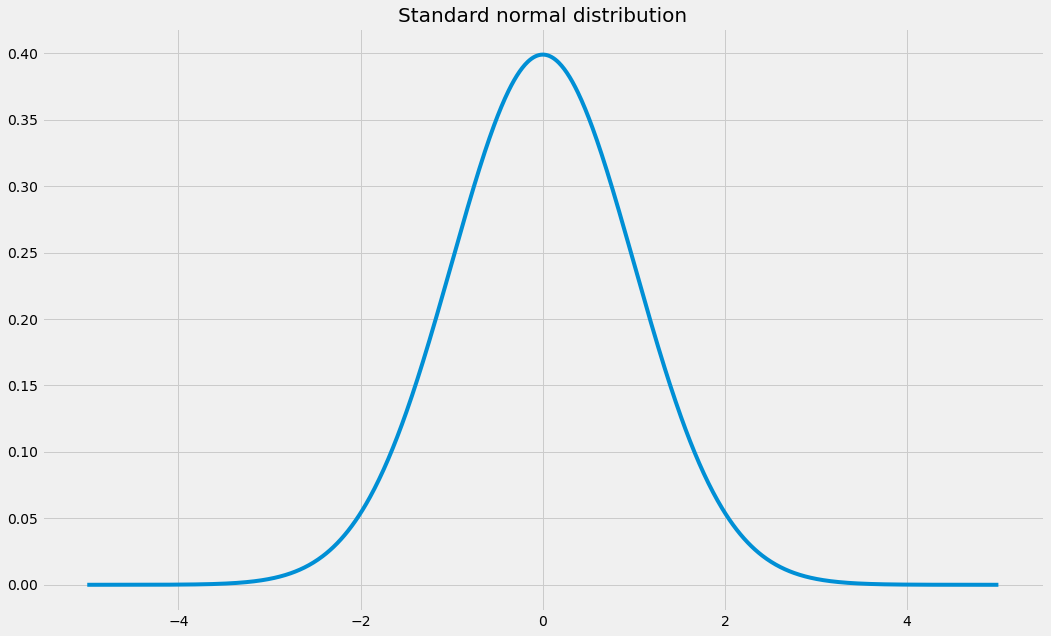

In [26]:
plt.plot(np.linspace(-5, 5, 1000), norm.pdf(np.linspace(-5, 5, 1000)))
plt.title('Standard normal distribution', fontsize=20)
plt.show()

X mean:
[2.61717625e+00 8.89178866e+00 3.46858633e+01 1.47337824e+02
 6.62964718e+02 3.10664370e+03 1.49946179e+04 7.40097896e+04
 3.71757450e+05 1.89408958e+06 9.76488362e+06 5.08473839e+07
 2.67042329e+08]
X std
[1.42904764e+00 8.26280332e+00 4.36295151e+01 2.28694895e+02
 1.20605446e+03 6.41842261e+03 3.44672461e+04 1.86543640e+05
 1.01602565e+06 5.56120143e+06 3.05530627e+07 1.68325268e+08
 9.29250585e+08]


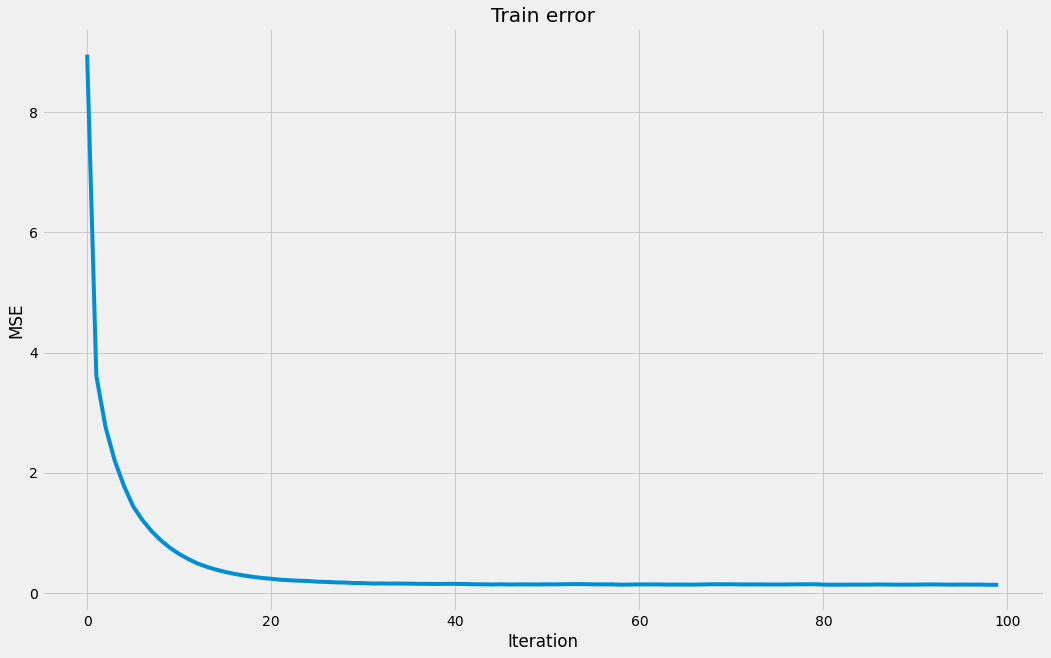

In [27]:
lmbd = 0.1
degree = 13
dlist = list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T
# compute sample mean
x_mean = X.mean(axis=0)
print('X mean:')
print(x_mean)
# compute sample std
x_std = X.std(axis=0)
print('X std')
print(x_std)
# apply transformation
X = (X - x_mean)/x_std
         
# add bias
X = np.column_stack((np.ones(X.shape[0]), X))
         
X[:, 0] = 1.0

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w = np.array([-1.0] * X.shape[1])

n_iter = 100
lr = 0.1
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))

plt.plot(loss)
plt.title('Train error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

Причешем код $L_1$ регрессии:

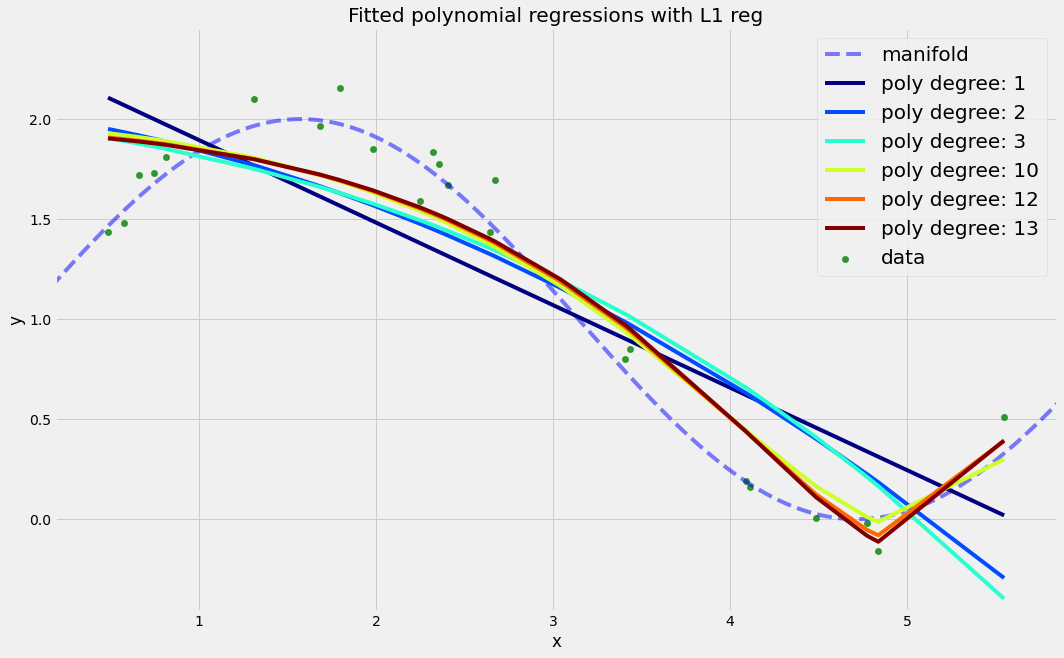

In [28]:
degree_list = [1, 2, 3, 10, 12, 13]
lmbd = 0.01
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

def fit_lr_l1(X, y, lmbd, n_iter=100, lr=0.1):
    w = np.array([-1.0] * X.shape[1])
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss
    
w_list_l1 = []
err = []
for ix, degree in enumerate(degree_list):
    dlist = list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    
    # normalization
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - x_mean)/x_std
    
    # add bias
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # train regression
    w, y_hat, loss = fit_lr_l1(X, data['y_train'], lmbd=lmbd)
    
    w_list_l1.append((degree, w))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L1 reg')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [29]:
for p, e in zip(degree_list, err):
    print(p, e)

1 0.15328671015933906
2 0.12170947617585046
3 0.12435957054094636
10 0.0605274945651205
12 0.05465961496510181
13 0.0535594909975341


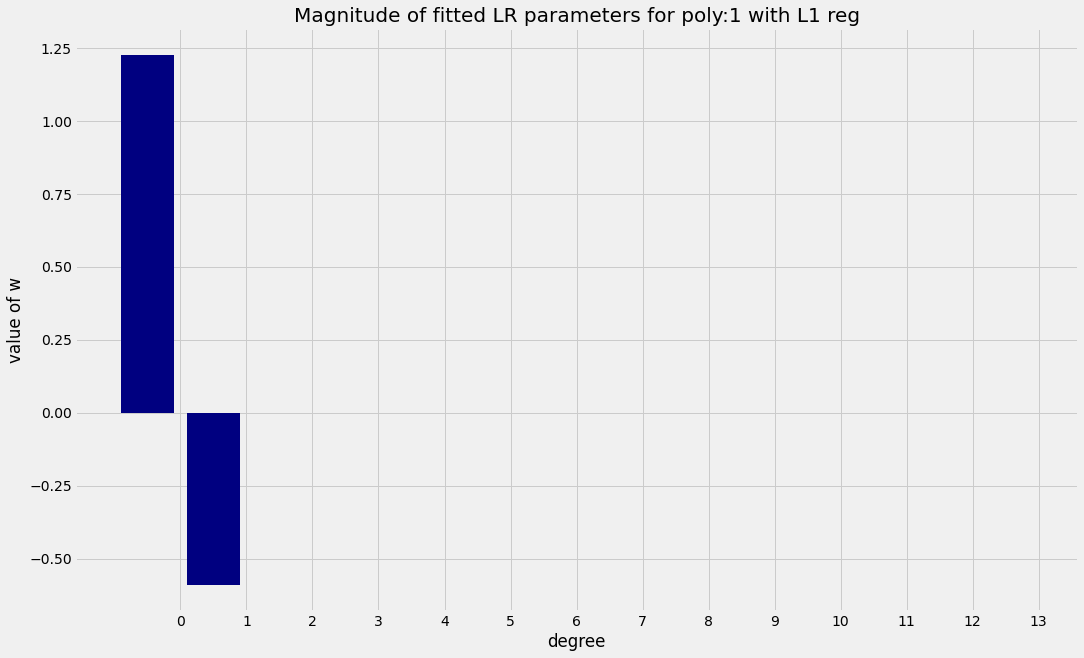

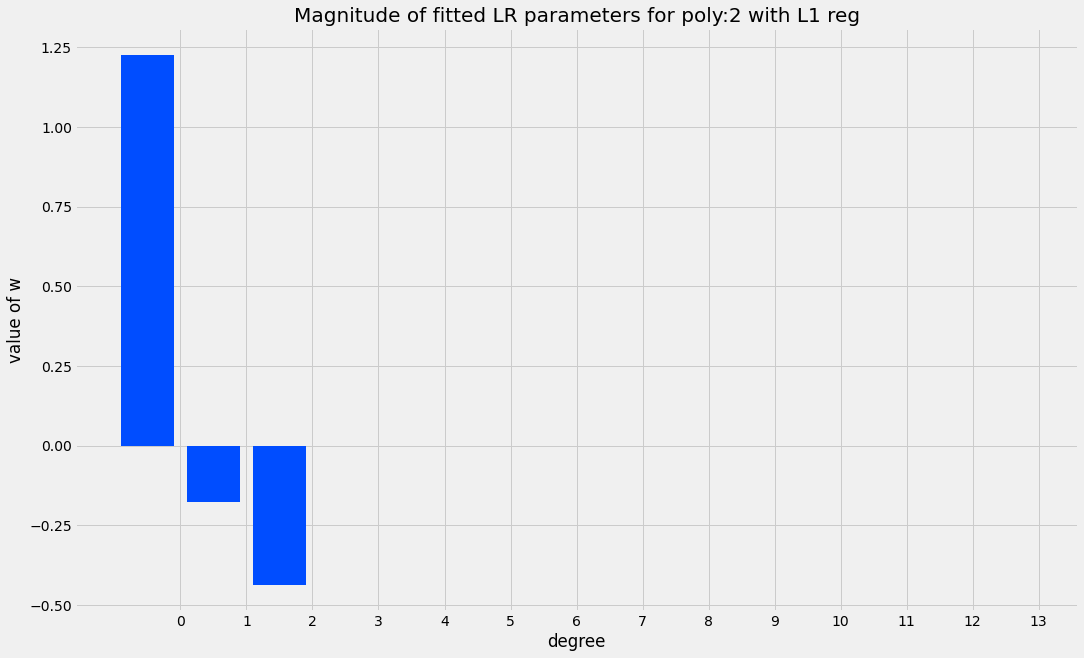

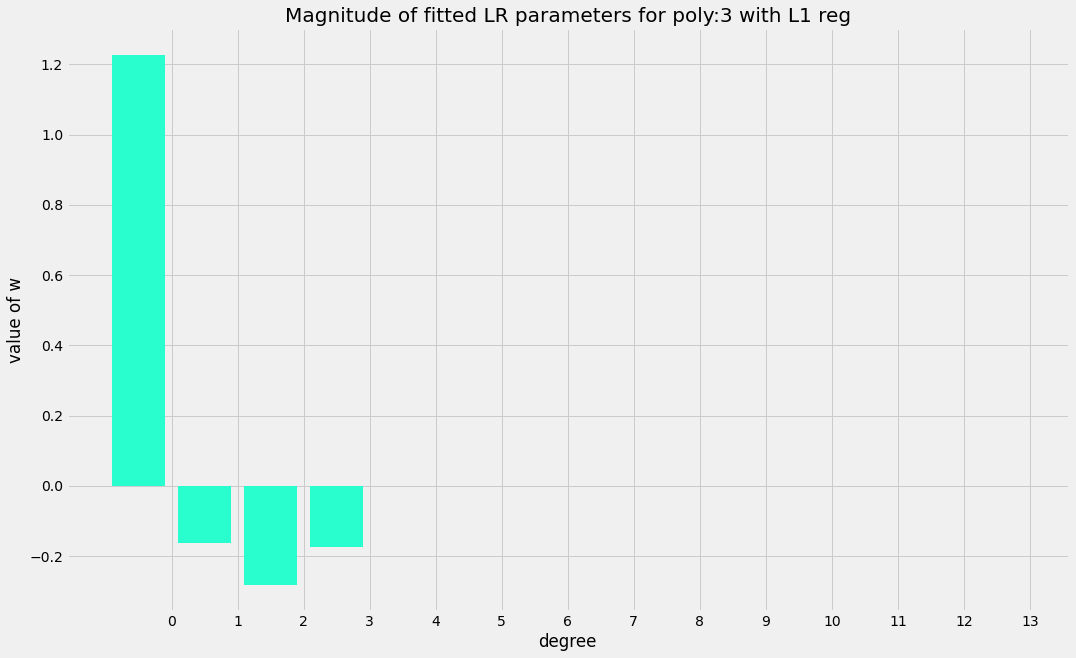

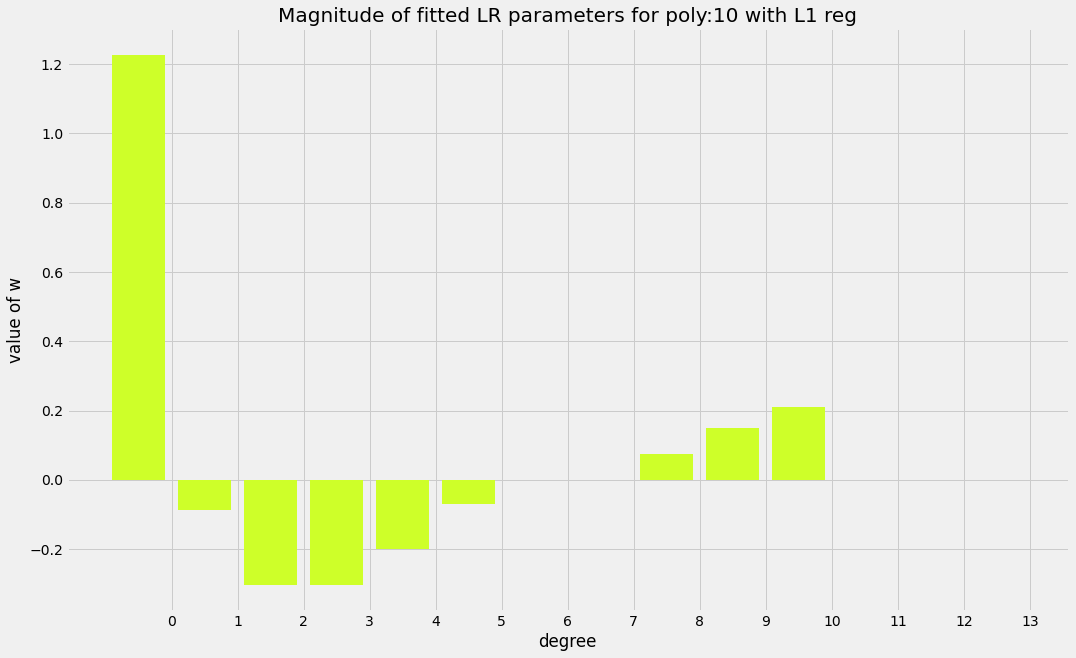

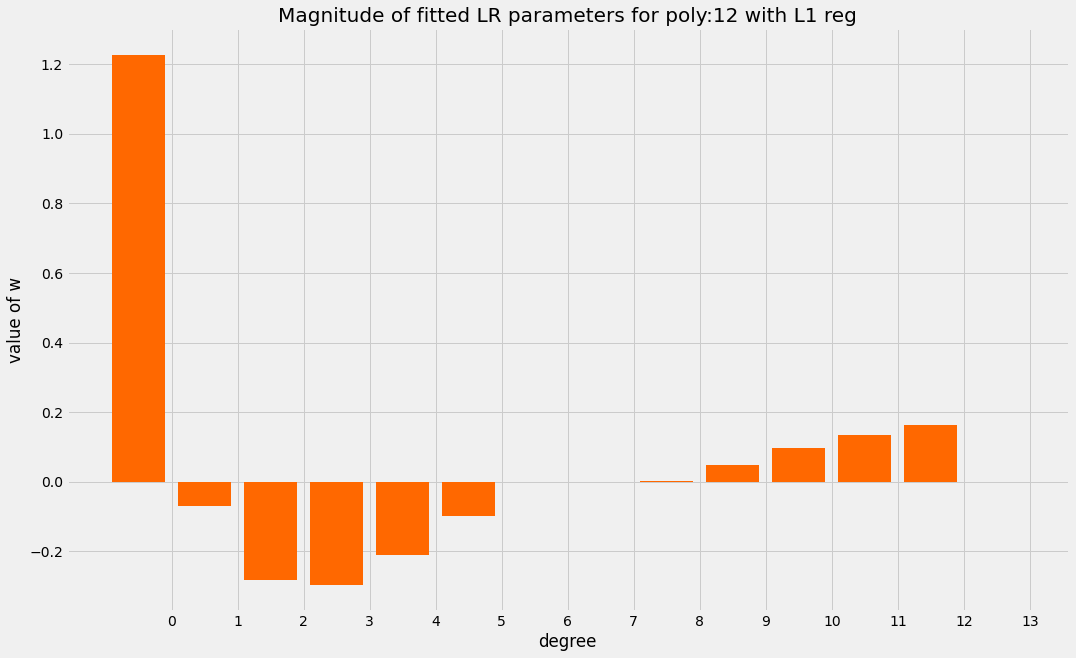

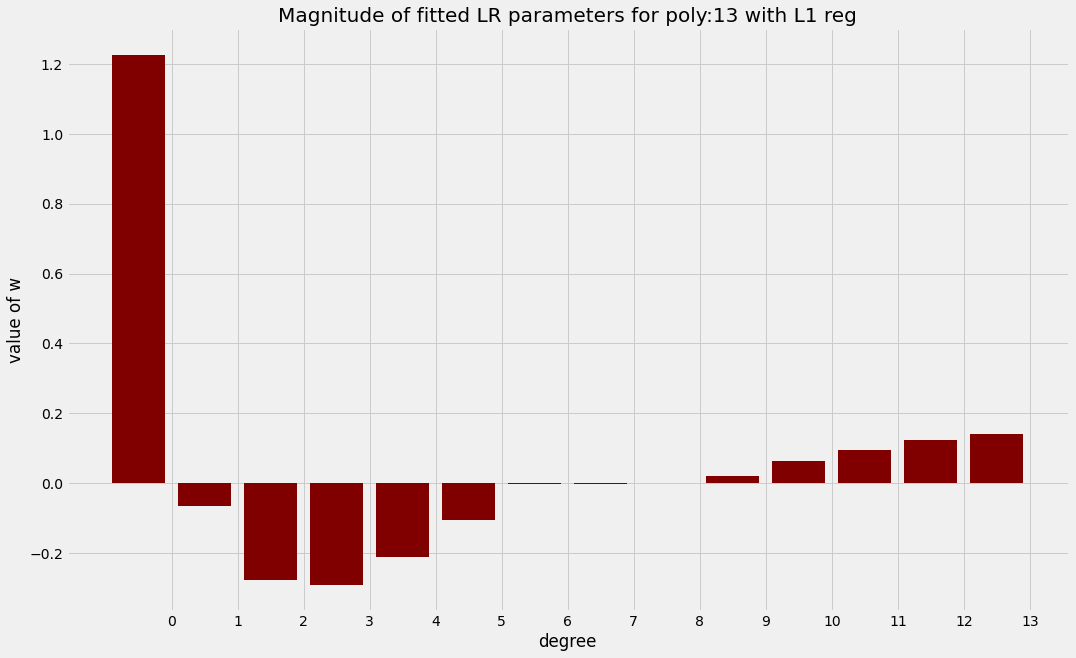

In [30]:
for ix, t in enumerate(w_list_l1):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L1 reg' % degree, fontsize=20)
    plt.xlabel('degree')
    plt.ylabel('value of w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

## Разложение ошибки на смещение и разброс - Bias-Variance Decomposition

[Bias–variance tradeoff](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%BB%D0%B5%D0%BC%D0%BC%D0%B0_%D1%81%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D1%8F%E2%80%93%D0%B4%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%B8)

Истинное значение целевой переменной складывается из некоторой детерминированной функции $f(\vec{x})$ и случайной ошибки $\epsilon$: $y = f\left(\vec{x}\right) + \epsilon$;

Ошибка распределена нормально с центром в нуле и некоторым разбросом: $\epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$;
Истинное значение целевой переменной тоже распределено нормально: $y \sim \mathcal{N}\left(f\left(\vec{x}\right), \sigma^2\right)$

Мы хотим найти функцию $\hat {f}(x)$, которая аппроксимирует истинную функцию $ f(x)$ настолько хорошо, насколько возможно, в смысле некоторого алгоритма обучения. Мы делаем понятие «настолько хорошо, насколько возможно» точным путём измерения среденквадратичной ошибки между $y$ и $\hat {f}$ — мы хотим, чтобы значение $(y-{\hat {f}}(x))^{2}$ было минимальным как для точек $ x_{1},\dots ,x_{n}$, так и за пределами нашей выборки. Естественно, мы не можем сделать это идеально, поскольку $ y_{i}$ содержит шум $ \epsilon $ . Это означает, что мы должны быть готовы принять неустранимую ошибку в любой функции, с которой будем работать.

Поиск функции $\hat {f}$, которая обобщается для точек вне тренировочного набора, может быть осуществлён любым из несчётного числа алгоритмов, используемых для обучения с учителем. Оказывается, что какую бы функцию $\hat {f}$ мы ни выбрали, мы можем разложить её ожидаемую ошибку на непросмотренном экземпляре данных $\vec x$ следующим образом:

\begin{aligned}\operatorname {E} {\Big [}{\big (}y-{\hat {f}}(\vec x){\big )}^{2}{\Big ]}&={\Big (}\operatorname {Bias} {\big [}{\hat {f}}(\vec x){\big ]}{\Big )}^{2}+\operatorname {Var} {\big [}{\hat {f}}(\vec x){\big ]}+\sigma ^{2}\\\end{aligned}

где

\begin{aligned}\operatorname {Bias} {\big [}{\hat {f}}(\vec x){\big ]}=\operatorname {E} {\big [}{\hat {f}}(\vec x)-f(\vec x){\big ]}\end{aligned}

и

\begin{aligned}\operatorname {Var} {\big [}{\hat {f}}(\vec x){\big ]}=\operatorname {E} [{\hat {f}}(\vec x)^{2}]-{\Big (}\operatorname {E} [{\hat {f}}(\vec x)]{\Big )}^{2}\end{aligned} 

- квадрата смещения: $\text{Bias}\left(\hat{f}(\vec x) \right)$ – средняя ошибка по всевозможным наборам данных;
- дисперсии: $\text{Var}\left(\hat{f}(\vec x) \right)$ – вариативность ошибки, то, на сколько ошибка будет отличаться, если обучать модель на разных наборах данных;
- неустранимой ошибки: $\sigma^2$.

![Bias–variance tradeoff](https://habrastorage.org/webt/mp/jr/fo/mpjrfodzlknbpirv2rs8fxf8-rs.png)

In [32]:
import pandas as pd

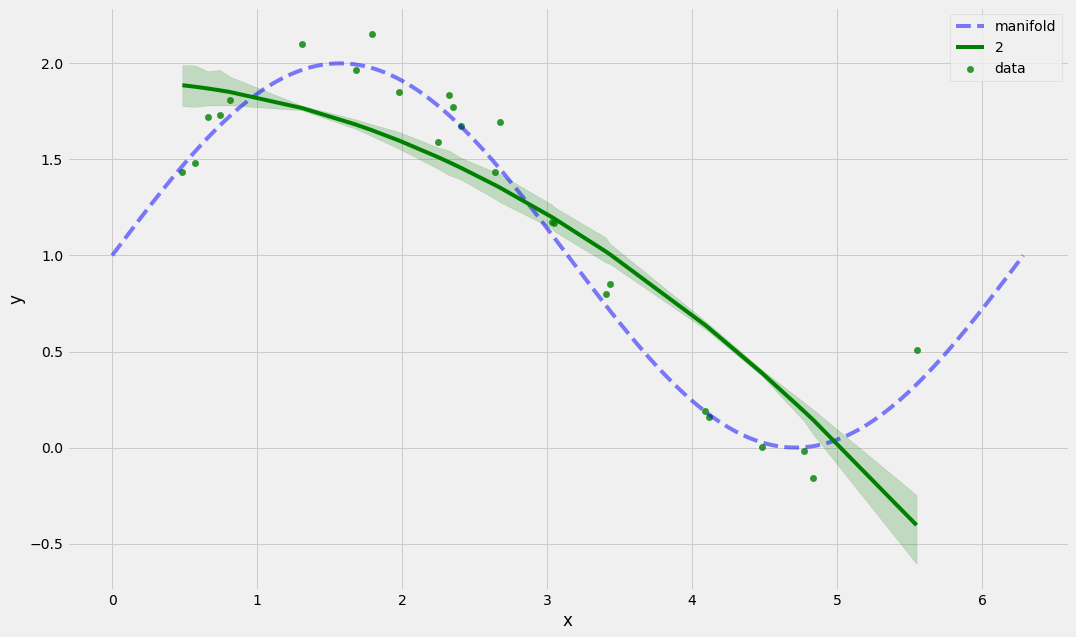

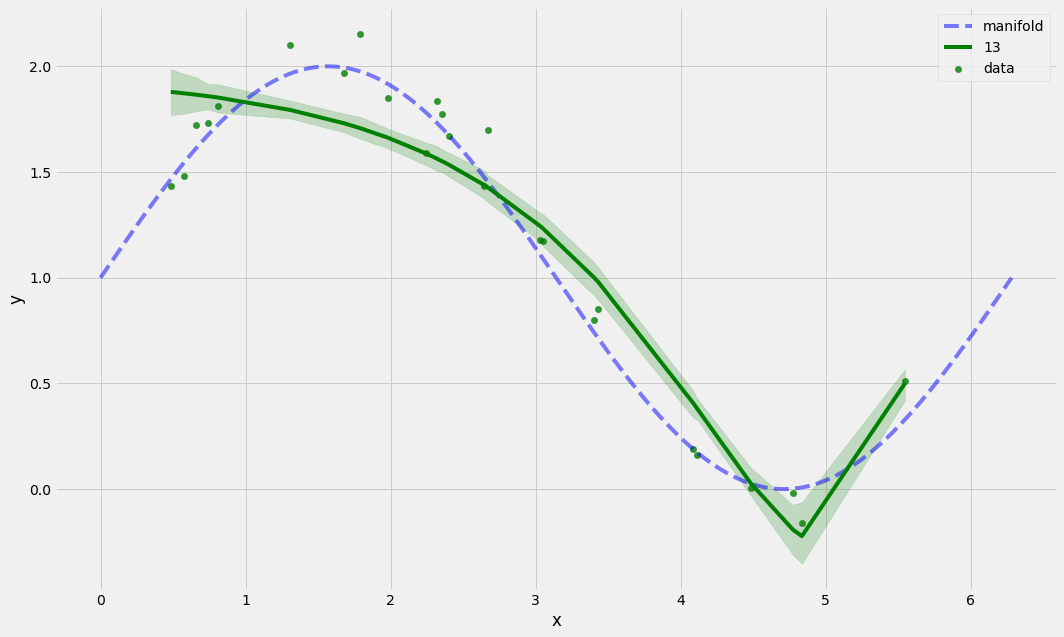

In [33]:
def fit_lr_l1(X, y, lmbd, n_iter=100, lr=0.1):
#     w = np.array([-1.0] * X.shape[1])
    w = np.random.random((X.shape[1],))*4 - 2
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss

w_list_l1 = []
err = []

degree_list = [2, 13]
lmbd = 0.01

n_repetition = 30

for ix, degree in enumerate(degree_list):
    rez = []
    for _ in range(n_repetition):
        dlist = list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
        X = np.array(dlist).T

        # normalization
        x_mean = X.mean(axis=0)
        x_std = X.std(axis=0)
        X = (X - x_mean)/x_std

        # add bias
        X = np.column_stack((np.ones(X.shape[0]), X))
        
        # train regression
        w, y_hat, loss = fit_lr_l1(X, data['y_train'], lmbd=lmbd)
    
        w_list_l1.append((degree, w))
        err.append(np.mean((data['y_train'] - y_hat)**2))
        rez += [{'x': x, 'y': y} for x, y in  zip(data['x_train'], y_hat)]
    rez = pd.DataFrame(rez)
    plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

    sns.lineplot(x=rez['x'], y=rez['y'], hue=degree, ci=100, palette=['g'])
    plt.show()


Полезные ссылки:
* [cs229 by Andrew Ng](https://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf)
* [Линейная регрессия++ блог Александра Дьяконова](https://dyakonov.org/2019/10/31/%d0%bb%d0%b8%d0%bd%d0%b5%d0%b9%d0%bd%d0%b0%d1%8f-%d1%80%d0%b5%d0%b3%d1%80%d0%b5%d1%81%d1%81%d0%b8%d1%8f/)
  